In [2]:
# This script should import all the csv files and enable working with them in an easy and intuitive way

# import required packages

import glob
import pandas as pd
import numpy as np

# Required information regarding the dates

import datetime

start = datetime.datetime.strptime("2013-04-28", "%Y-%m-%d")
end = datetime.datetime.strptime("2018-09-09", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days,7)]

list_of_dates = []
for date in date_generated:
    list_of_dates.append(date.strftime("%Y-%m-%d"))
stringlist = (','.join(list_of_dates)) 

dates = stringlist.replace("-","")
dates = dates.split(",")

base = 'https://coinmarketcap.com/historical/'

snaps = []
for x in dates:
       snaps.append((base + x))

# So far the required information
    
# For each df add the desired column


# THE SAME AS ABOVE BUT FOR ALL THE FILES

m=0
j=0
h=0
counter = list(range(len(dates)))

for m in counter:

    df = pd.read_csv('/Users/jose/Desktop/PAPERS/ICO PAPER/DATA/Original scraped data/'+ dates[m] +'.csv')
    
    length = list(range(0, len(df)))
    
    datacol = []
    
    for c in length:
        datacol.append(dates[h])
        
    datacol = pd.DataFrame({"Date":datacol})

    df = df.join(datacol)

    import os
    os.getcwd()
    dir = os.getcwd()
    
    df.to_csv("/Users/jose/Desktop/PAPERS/ICO PAPER/DATA/Prepared data/" + dates[m] + ".csv")
    
    
    h += 1
    m += 1

In [4]:
# Add up all the csv files

path = '/Users/jose/Desktop/PAPERS/ICO PAPER/DATA/Prepared data/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

frame = frame.drop('Unnamed: 0', 1)
frame = frame.drop('Unnamed: 0.1', 1)


frame.to_csv("/Users/jose/Desktop/PAPERS/ICO PAPER/DATA/Prepared data/AGGREGATED.csv")
    

In [5]:
# So far clear

In [6]:
import pandas as pd
import numpy as np

# Now implement the loop to replicate this for all the dates:

for m in dates:
    
    frame['Price_'+m] = np.where(frame["Date"]==int(m), frame["Price"], '0')


In [7]:
frame.to_csv("/Users/jose/Desktop/PAPERS/ICO PAPER/DATA/Prepared data/AGGREGATED.csv")

In [8]:
# So far clear
print(frame['Price_20180902'].unique())

['0' '$7221.86' '$295.62' ... '$0.000003' '$0.000002' '$4.8e-07']


In [9]:
currencies = frame.Symbol.unique()
currencies = list(currencies)

In [10]:
frame = frame.drop('Price', 1)
frame = frame.drop('Date', 1)
frame.to_csv("/Users/jose/Desktop/PAPERS/ICO PAPER/DATA/Prepared data/AGGREGATED.csv",index = False)
    

In [11]:
for a in dates:
    frame['Price_'+a] = frame['Price_'+a].str.replace('$','', regex=False)

In [12]:
for a in dates:
    frame['Price_'+a] = frame['Price_'+a].str.replace(',','', regex=False)

In [13]:
for a in dates:
    pd.to_numeric(frame['Price_'+a])

In [14]:
column_names=[]
for t in dates:
    column_names.append('Price_'+t) 

In [15]:
for a in column_names:
    frame[a] = frame[a].apply(pd.to_numeric)

In [16]:
# SO FAR GOOD. NOW REPLICATE EVERYTHING FOR ALL THE CURRENCIES

In [17]:
BTC = frame['Symbol'] == "BTC"

In [18]:
symbols = frame["Symbol"].unique()
symbols = symbols.tolist()

In [19]:
type(symbols)
len(symbols)

2910

In [20]:
BTC = frame['Symbol'] == "BTC"
onlybtc = frame[BTC]

In [21]:
#CONTINUE HERE!!!!
# JUST REPLICATE WHAT YOU DID WITH BTC FOR ALL THE CURRENCIES!

BTC = frame['Symbol'] == "BTC"
onlybtc = frame[BTC]

x = []
names = symbols
for s in symbols:
    x.append(frame['Symbol'] == symbols[symbols.index(s)])

In [22]:
# This creates a list of datasets. Each of the dataset contains only the prices for each of the currencies. To access a currency: y[n]
y = []
numbers = list(range(0, 2910))
for n in numbers:
    y.append(frame[x[n]])
    

In [23]:
# This gives me a string with all the BTC price for the 280 dates
BTC_Price = []

for values in dates:
    BTC_Price.append(onlybtc['Price_'+values].sum())

In [24]:
final = []
for n in numbers: 
    for values in dates:
        final.append(y[n]['Price_'+values].sum())

In [25]:
# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]

In [26]:
# Create a list that from the results of the function chunks:
chunks = list(chunks(final, 280))

In [78]:
df = pd.DataFrame(chunks,columns=dates)

In [47]:
sym=pd.DataFrame(symbols)

In [51]:
final = sym.join(df).ffill()

In [79]:
final

,0,20130428,20130505,20130512,20130519,20130526,20130602,20130609,20130616,20130623,...,20180701,20180708,20180715,20180722,20180729,20180805,20180812,20180819,20180826,20180902
0,BTC,135.580000,113.460000,116.070000,123.100000,131.960000,126.900000,101.790000,100.160000,107.730000,...,6377.870000,6831.200000,6296.660000,7426.220000,8206.830000,7012.950000,6330.180000,6400.320000,6681.720000,7221.860000
1,XRP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.458594,0.490595,0.439983,0.452852,0.452749,0.430342,0.305969,0.329826,0.324169,0.345170
2,LTC,4.330000,3.530000,3.360000,3.340000,3.150000,2.800000,2.390000,2.070000,3.130000,...,80.300000,85.250000,77.180000,83.880000,84.100000,73.410000,60.150000,57.080000,56.950000,65.880000
3,DASH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,235.670000,245.820000,223.950000,255.360000,240.510000,203.780000,166.110000,152.130000,141.210000,216.880000
4,DOGE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002507,0.002614,0.002365,0.003430,0.003398,0.002789,0.002398,0.002385,0.002342,0.005921
5,BTS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.139632,0.178510,0.170630,0.202079,0.194652,0.157559,0.117534,0.109396,0.105841,0.124052
6,XLM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.194298,0.209947,0.211179,0.296212,0.313509,0.240711,0.223537,0.224181,0.214614,0.228789
7,PPC,0.389696,0.297292,0.249882,0.191015,0.207422,0.156907,0.114570,0.110345,0.124103,...,1.370000,1.490000,1.430000,1.460000,1.600000,1.410000,1.830000,1.090000,1.150000,1.350000
8,NXT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.095447,0.099280,0.082130,0.100879,0.104138,0.082645,0.078842,0.068253,0.068817,0.078137
9,BANX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


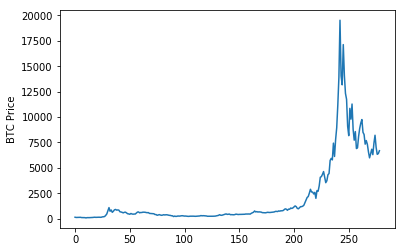

In [107]:
import matplotlib.pyplot as plt

a=(final.iloc[0])
a=a.tolist()

plt.plot(a[1:280])
plt.ylabel('BTC Price')
plt.show()

In [102]:
symbols.index("ETH")

567

In [105]:
final.to_csv("/Users/jose/Desktop/PAPERS/ICO PAPER/DATA/Prepared data/Historical weekly price of all listed tokens ever.csv")